<a href="https://colab.research.google.com/github/LillySh/WishList/blob/main/NLP_Potapova_HW4_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Семантические запросы и аналогии

В 2012 году Томаш Миколов, тогда еще стажер в Microsoft, нашел способ кодиро-
вания смысла слов в векторах относительно небольшой размерности. Миколов обучил нейронную сеть3 предсказывать вхождения слов поблизости целевых слов.
В 2013-м, уже в Google, Миколов с соратниками выпустил программное обеспечение для создания этих векторов слов и назвал его Word2vec4.

Векторы слов - это числовые представления семантики слов, включая прямой и скрытый смысл. Эти векторы могут захватывать подтекст, например, peopleness, animalness, placeness, thingnesы и даже conceptness, объеденяя все это в плотный (без нулей) вектор из значений с плавающей точкой. Благодаря таким плотным векторам возможны семантические запросы и логические умозаключения.





In [ ]:
pip install nlpia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 32.0 MB 1.4 MB/s 
     |████████████████████████████████| 706 kB 38.8 MB/s 
     |████████████████████████████████| 121 kB 55.1 MB/s 
     |████████████████████████████████| 1.6 MB 55.1 MB/s 
     |████████████████████████████████| 214 kB 46.9 MB/s 
     |████████████████████████████████| 174 kB 53.6 MB/s 
     |████████████████████████████████| 2.2 MB 41.7 MB/s 
     |████████████████████████████████| 83 kB 1.9 MB/s 


In [ ]:
from nlpia.data.loaders import get_data
wv = get_data('word2vec')

2022-12-16 13:59:17,447 WARNING:  nlpia.loaders:528:normalize_ext_rename normalize_ext.filepath=/usr/local/lib/python3.8/dist-packages/nlpia/bigdata/googlenews-vectors-negative300.bin.gz


Поиск слов, сочетающие смыслы женщина, Европа, физика, ученые, знаменитости.

In [ ]:
answer_vector = wv['woman'] + wv['Europe'] + wv['physics'] + wv['scientist']

Who is to nuclear physics what Louis Pasteur is to germs?

In [ ]:
answer_vector = wv['Louis_Pasteur'] - wv['germs'] + wv['physics']

1.0

Who is the Marie Curie of music? Или Marie Curie is to science as who is to music?

In [ ]:
wv['Marie_Curie'] - wv['science'] + wv['music']

<ipython-input-4-29dc56b362d7>:2: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  doc2.similarity(doc[2:5])


0.22478505229070148

The Timbers are to Portland as what is to Seattle?

In [ ]:
wv['Timbers'] - wv['Portland'] + wv['Seattle']

oranges

Обучение без учителя (unsupervised learning) и с учителем (supervised learning) —
два принципиально различных подхода к машинному обучению.

## Машинное обучние с учителем

При машинном обучении с учителем тренировочные данные обязательно должны быть

как-то маркированы. Пример таких меток — категорийная метка спама на СМС в гла-
ве 4. Еще один пример — количественное значение числа лайков для твита. Именно

машинное обучение с учителем большинство людей подразумевают под машинным
обучением. Модель с учителем может измениться в лучшую сторону только путем

измерения различий между ожидаемыми выходными данными (метками) и полу-
ченными предсказаниями.

Машинное обучение без учителя позволяет машине обучаться непосредственно
на данных без какой-либо помощи со стороны человека. Тренировочные данные
могут быть не упорядочены, не структурированы и никак не маркированы. Поэтому
алгоритмы машинного обучения без учителя, вроде Word2vec, идеально подходят
для текстов на естественных языках.

## Машинное обучение без учителя

При машинном обучении без учителя модель обучается выполнять задачу без ка-
ких-либо меток на основе одних только исходных данных. Примерами машинного

обучения без учителя могут послужить алгоритмы кластеризации, например метод
k-средних и DBSCAN. Также методиками машинного обучения без учителя являются

алгоритмы понижения размерности, такие как метод главных компонент (PCA) и ме-
тод стохастических вложений соседей на основе распределения Стьюдента (t-SNE).

При машинном обучении без учителя модель ищет закономерности в связях между

самими точками данных. Сделать модель без учителя «умнее» (точнее) можно, предо-
ставив ей больше данных.

Импортируем KeyedVectors

In [ ]:
from gensim.models.keyedvectors import KeyedVectors

I want to buy this beautiful book at the end of the week.
similarity to fruits is -0.04223029315471649 

Sales of citrus have increased over the last year.
similarity to fruits is -0.027368908748030663 

How much do you know about this type of tree?
similarity to fruits is -0.07132802903652191 



<ipython-input-8-52ad01cea877>:7: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  print('similarity to', token.text, 'is', token.similarity(sent),'\n')


In [ ]:
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')

vec_king = wv['king']

In [ ]:
word_vector = api.load('word2vec-google-news-300')

In [ ]:
word_vectors = KeyedVectors.load_word2vec_format('/path/to/GoogleNews-vectors-negative300.bin.gz', binary=True, limit=200000)

In [ ]:
word_vectors.most_similar(positive=['cooking', 'potatoes'], topn=5)

In [ ]:
word_vectors.most_similar(positive=['germany', 'france'], topn=1)

Модели векторов слов дают возможность также определять и несвязанные термы. В библиотеке gensim есть метод doesnt_match.

Он возвращает от остальных термов списка наиболее удаленный терм, благодаря чему можно определить самый посторонний терм из списка.



In [ ]:
word_vectors.doesnt_match("potatoes milk cake computer".split())

{0: 0.0726100970506393, 1: 0.2306078439472607, 2: 0.31927317721232235}


<ipython-input-9-8b19815d5d94>:11: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  similarity.update({i:token.similarity(noun_span_doc)}) #подобие сохраняем в ассоциативный массив


Для выполнения вычислений (как в знаменитом примере king + woman – man = queen, который и привлек изначально внимание Миколова) можно добавить в вызов метода most_similar аргумент negative

In [ ]:
word_vectors.most_similar(positive=['king', 'woman'], negative=['man'], topn=2)

['Google', 'Search', 'Google', 'each', 'day']
['Microsoft', 'Windows', 'Microsoft']
['Titicaca', 'Andes']


Библиотека gensim позволяет вычислять подобие между двумя термами. Для сравне ния двух термов и определения их косинусного коэффициента воспользуйтесь методом .similarity()

In [ ]:
word_vectors.similarity('princess', 'queen')

doc1 is similar to doc2: 0.7054618244550298
doc1 is similar to doc3: 0.6104506459201123
doc2 is similar to doc3: 0.6308411086910213


<ipython-input-11-3ba975a8ccfc>:1: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  print('doc1 is similar to doc2:',spans[0].similarity(spans[1]))
<ipython-input-11-3ba975a8ccfc>:2: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, 

### Этапы предварительной обработки

Прежде всего необходимо разбить документы на предложения, а последние — на токены. Модель gensimword2vec ожидает на входе список предложений, в котором каждое разбито на токены. Это предотвращает обучение векторов слов на посторонних вхождениях слов в соседних предложениях.

In [ ]:
token_list

We You nsubj nominal subject
can must aux auxiliary
overtake specify ROOT root
them it dobj direct object


### Обучение предметно-ориентированной модели

Начнем с загрузки модуля Word2vec:

In [ ]:
from gensim.models.word2vec import Word2Vec

Found


In [ ]:
num_features = 300 #количество элементов (измерений) векторов слов
min_word_count =3 #Минимальное количество вхождений слова, учитываемое в модели Word2vec. если ваш корпус мал, уменьшите этот параметр. Если же обучение производится на большом корпусе, увеличьте.
num_workers =2 #Количество используемых для обучения ядер CPU
window_size = 6 #Размер окна контекста
subsampling = 1e-3  #Частота прореживания для часто встречающихся термов

Span:  We can overtake
The positions in the doc are:  0 - 3


Создадим экземпляр модели

In [ ]:
model = Word2Vec(token_list, workers=num_workers, size=num_features, min_count=min_word_count, window=window_size, sample=subsampling)

Found


После обучения модели слов можно уменьшить объем используемой оперативной памяти примерно наполовину, «заморозив» модель и отбросив ненужную информацию. Следующая команда исключает ненужные выходные веса из нейронной сети

Метод init_sims замораживает модель, сохраняя веса скрытого слоя и отбрасывая выходные веса, предсказывающие совместную встречаемость слов. Выходные веса не входят в векторы, применяемые для большинства приложений Word2vec.

In [ ]:
model.init_sims(replace=True)

Found: the pronoun in position of direct object is plural


Сохранение обученной модели для последующего использования

In [ ]:
model_name = "my_domain_specific_word2vec_model"
model.save(model_name)

Загрузка сохраненной модели

In [ ]:
model_name = "my_domain_specific_word2vec_model"
model = Word2Vec.load(model_name)
model.most_similar('radiology')

## Использование предобученных моделей fastText

FastText можно использовать аналогично модели Word2vec компании Google. Зайдите в репозиторий fastText и скачайте бинарный и текстовый файлы модели для интересующего вас языка. По окончании скачивания распакуйте бинарный файл языка. Затем можно загрузить его в gensim с помощью следующего кода.й

In [ ]:
from gensim.models.fasttext import FastText 
ft_model = FastText.load_fasttext_format(model_file=MODEL_PATH) #Аргумент model_file указывает на каталог, в котором находятся файлы bin и vec модели
ft_model.most_similar('soccer') #После загрузки модели её можно использовать аналогично любой другой в gensim

Загрузка переобученной модели с помощью nlpia

Для начала загрузим все векторы слов из модели Word2vec корпуса Google News. Этот корпус включает множество упоминаний Портленда и Орегона, а также других названий городов и штатов. Для упрощения мы воспользуемся пакетом nlpia, чтобы можно было быстро начать эксперименты с векторами Word2vec

In [ ]:
from gensim.models import word2vec
import os
from nlpia.loaders import get_datafrom gensim.model.word2vec 
import KeyedVectors
wv=get_data('word2vec')
len(wv.vocab)

I can recognize symbols too.


Выведение частотности слов в словаре Word2vec.

In [ ]:
import pandas as pd
vocab = pd.Series(wv.vocab)
vocab.iloc[1000000:100006]

It seems the user wants a ticket to Berlin


Определение близости векторов

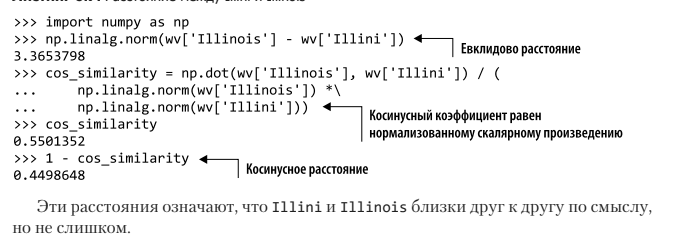

In [ ]:
import numpy as np
np.linalg.norm(wv['Illinois'] - wv['Illini'])

18.6 million units sold.


In [ ]:
cos_similarity = np.dot(wv['Illinois'], wv['Illini']) / (np.linalg.norm(wv['Illinois']) * np.linalg.norm(wv['Illini']))

In [ ]:
cos_similarity

In [ ]:
1-cos_similarity

Загрузим другой набор данных, содержащий список городов и штатов (областей) со всего мира.

Этот набор данных от Geocities содержит массу информации, включая долготу, широту и население. Его можно использовать для различных интересных визуали- заций или сравнения географического расстояния с расстоянием Word2vec.

In [ ]:
from nlpia.data.loaders import get_data
cities = get_data('cities')
cities.head(1).T

The product sales hit 18.6 million units sold.


Получим информацию по городам id, город, штат

In [ ]:
us = cities[(cities.country_code == 'US') & (cities.admin1_code.notnull())].copy()
states = pd.read_csv('http://www.fonz.net/blog/wp-content/uploads/2008/04/states.csv')
states = dict(zip(states.Abbreviation, states.State))
us['city'] = us.name.copy()
us['st'] = us.admin1_code.copy()
us['state'] = us.st.map(states)
us[us.columns[-3:]].head()

Просмотр сокращений

In [ ]:
vocab = pd.np.concatenate([us.city, us.st, us.state])
vocab = np.array([word for word in vocab if word in wv.wv])
vocab[:5]

Добавление векторов слов для городов с векторами слов для штатов

In [ ]:
city_plus_state = []
for c, state, st in zip(us.city, us.state, us.st):
  if c not in vocab:
     continue
  row = []
  if state in vocab:
    row.extend(wv[c] + wv[state])
  else:
    row.extend(wv[c] + wv[st])
  city_plus_state.append(row)
us_300D = pd.DataFrame(city_plus_state)

When do you need to be in Berlin?


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #Полученные из PCA для визуализации 2D-векторы. Сохраняем исходные 300-мерные векторы Word2vec для будущих векторных умозаключений
us_300D = get_data('cities_us_wordvectors')
us_2D = pca.fit_transform(us_300D.iloc[:,:300]) #Последний столбец этого DataFrame содержит название города, хранящееся также в индексе DataFrame

The list of adjectival modifiers for word fruit: ['nice', 'exotic']
The list of GPE names applicable to word fruit as postmodifiers: ['Africa']


## Получение векторов документов в результате обучения

Аналогично обучению для получения векторов слов можно использовать пакет gensim для получения векторов документов.

In [ ]:
import multiprocessing
num_cores = multiprocessing.cpu_count()
from gensim.models.doc2vec import TaggedDocument, Doc2Vec
from gensim.utils import simple_preprocess
corpus = ['This is the first document ...', 'another document ...']
training_corpus = []
for i, text in enumerate(corpus):
  tagged_doc = TaggedDocument(simple_preprocess(text), [i])
  training_corpus.append(tagged_doc)
model = Doc2Vec(size=100, min_count=2, workers=num_cores, iter=10)
model.build_vocab(training_corpus)
model.train(training_corpus, total_examples=model.corpus_count, epochs=model.iter)

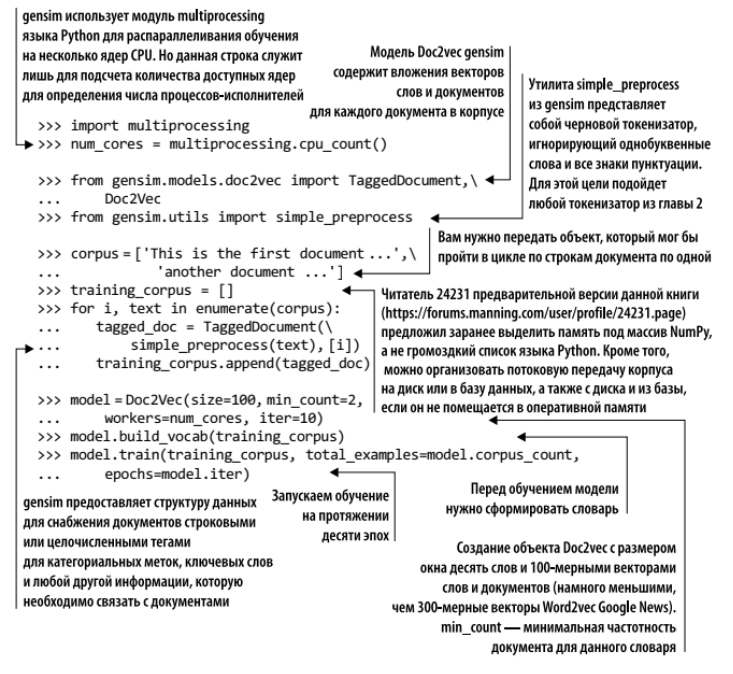

После обучения модели Doc2vec можно приступить к выводу векторов документов для новых, незнакомых алгоритму документов с помощью вызова метода infer_vector для созданной и обученной модели

In [ ]:
model.infer_vector(simple_preprocess('This is a completely unseen document'), steps=10) # Doc2vec требует шага для обучения при выводе новых векторов. В нашем примере обученный вектор обновляется за десять шагов (итераций)